Baseline model

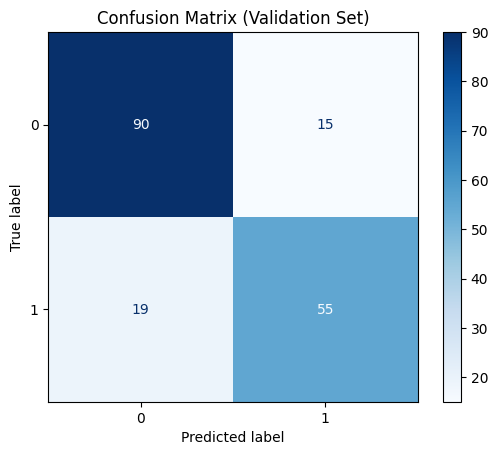

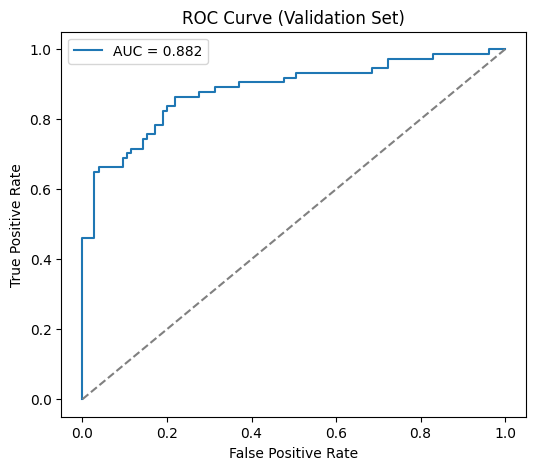

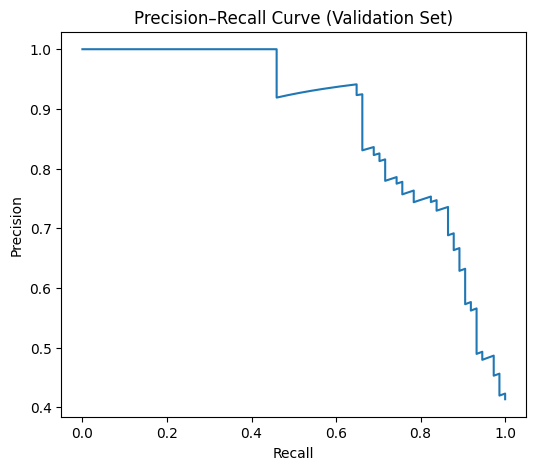

Kaggle submission file created: submission_baseline.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

# ========================
# 1. Load data
# ========================
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

# ========================
# 2. Warning-free preprocessing
# ========================

features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]

# ---- Fill missing values ----
# For Age this is a big mistake--better to use 1. Age dummy and 2. encoding based on medians for Sex and Pclass
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(train["Age"].median())

train["Fare"] = train["Fare"].fillna(train["Fare"].median())
test["Fare"] = test["Fare"].fillna(train["Fare"].median())

train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Embarked"] = test["Embarked"].fillna(train["Embarked"].mode()[0])

# ---- Encode categorical variables ----
label = LabelEncoder()
for col in ["Sex", "Embarked"]:
    train[col] = label.fit_transform(train[col])
    test[col] = label.transform(test[col])

# ========================
# 3. Train-validation split
# ========================
X = train[features]
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# 4. Train baseline model
# ========================
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions on validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# ========================
# 5. Visualizations of model performance
# ========================

# ---- Confusion Matrix ----
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation Set)")
plt.legend()
plt.show()

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_val, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Validation Set)")
plt.show()

# ========================
# 6. Prepare Kaggle submission
# ========================
X_test_final = test[features]
test_predictions = model.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_predictions
})

submission.to_csv("submission_baseline.csv", index=False)
print("Kaggle submission file created: submission_baseline.csv")